In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

from TME1 import GrowingSpheres, plot_boundaries, plot_obs_and_enemy

Charles Vin & Aymeric Delefosse <span style="float:right">DAC</span>

# XAI - TME 1 : Explication par génération d'exemples contre-factuels


## Expérimentations

### Stabilité

Pour mesurer la variabilité due à la composante aléatoire de l'algorithme, on générera des exemples contrefactueles multiples pour la même observation d'entrée. On pourra également comparer la stabilité de l'algorithme en utilisant différents classifieurs.


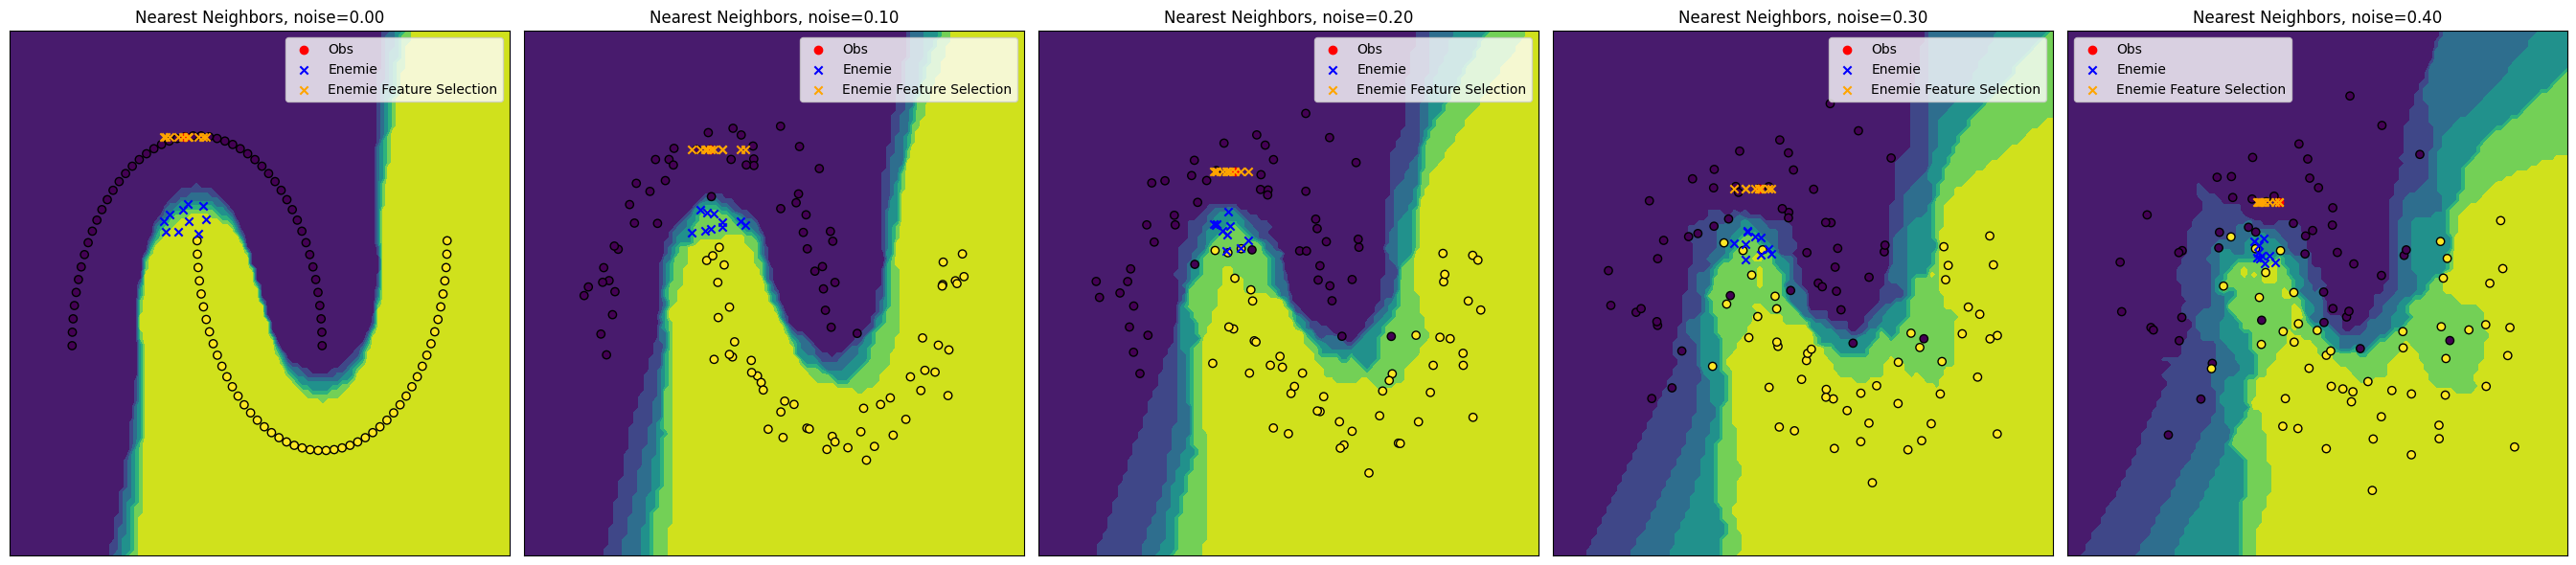

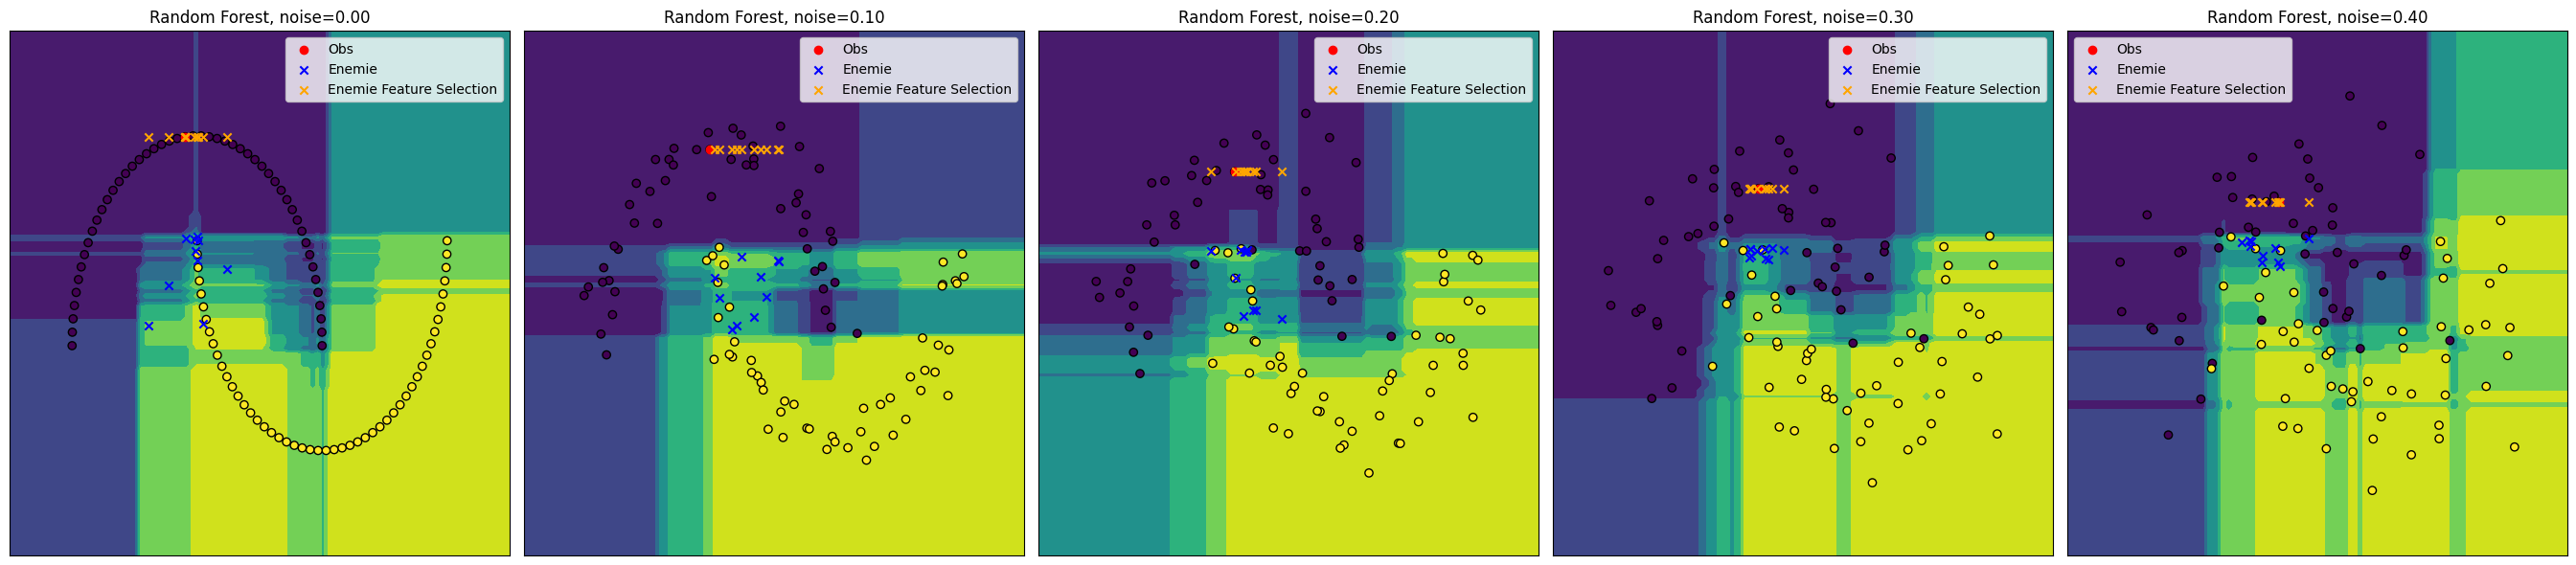

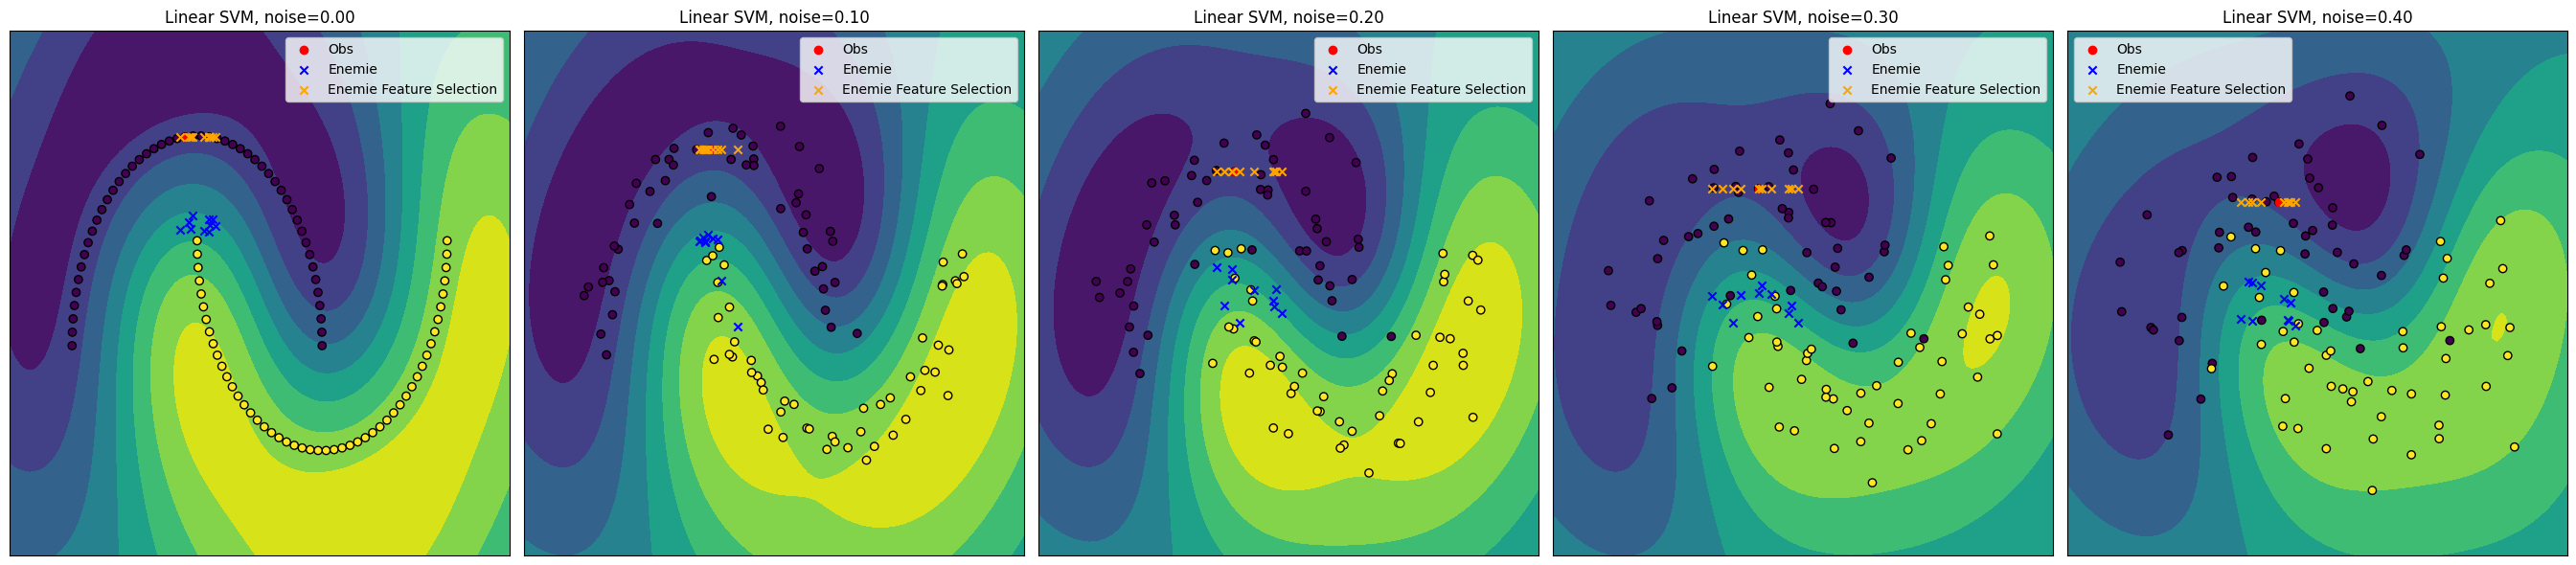

In [21]:
def oui(dataset, clf, n=10, eta=2, n_gs=100, ax=None):
    X, y = dataset
    obs_to_interprete = X[0]
    clf.fit(X, y)

    enemy_list = []
    enemy_fs_list = []
    for _ in range(n):
        gs = GrowingSpheres(clf, eta, n_gs)
        enemy, enemy_fs = gs.predict(obs_to_interprete)
        enemy_list.append(enemy)
        enemy_fs_list.append(enemy_fs)
        
    if not ax:
        _, ax = plt.subplots()
    plot_boundaries(X, y, ax, clf)
    ax.scatter(*obs_to_interprete, c="red", marker='o', label='Obs')
    for enemy, enemy_fs in zip(enemy_list[:-1], enemy_fs_list[:-1]):
        ax.scatter(*enemy, c="blue", marker='x')
        ax.scatter(*enemy_fs, c="orange", marker='x')
    ax.scatter(*enemy_list[-1], c="blue", marker='x', label='Enemie')
    ax.scatter(*enemy_fs_list[-1], c="orange", marker='x', label='Enemie Feature Selection')
    ax.legend()
    return ax

names = [
    "Nearest Neighbors",
    "Random Forest",
    "Linear SVM",
]
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    SVC(),
]
# Création de Dataset avec différent niveau de bruit
datasets = []
noise_lvl = []
for noise in np.arange(0, 0.5, 0.1):
    noise_lvl.append(noise)
    datasets.append(make_moons(noise=noise, random_state=0))

for clf, name in zip(classifiers, names):
    fig = plt.figure(figsize=(27, 6))
    for i, (dataset, noise) in enumerate(zip(datasets,noise_lvl)):
        tmp_ax = fig.add_subplot(1, len(datasets), i+1)
        tmp_ax.set_title(f'{name}, noise={noise:.2f}')
        oui(dataset, clf, ax=tmp_ax)
    fig.tight_layout()

**À interpréter**


### Autre dataset jouet


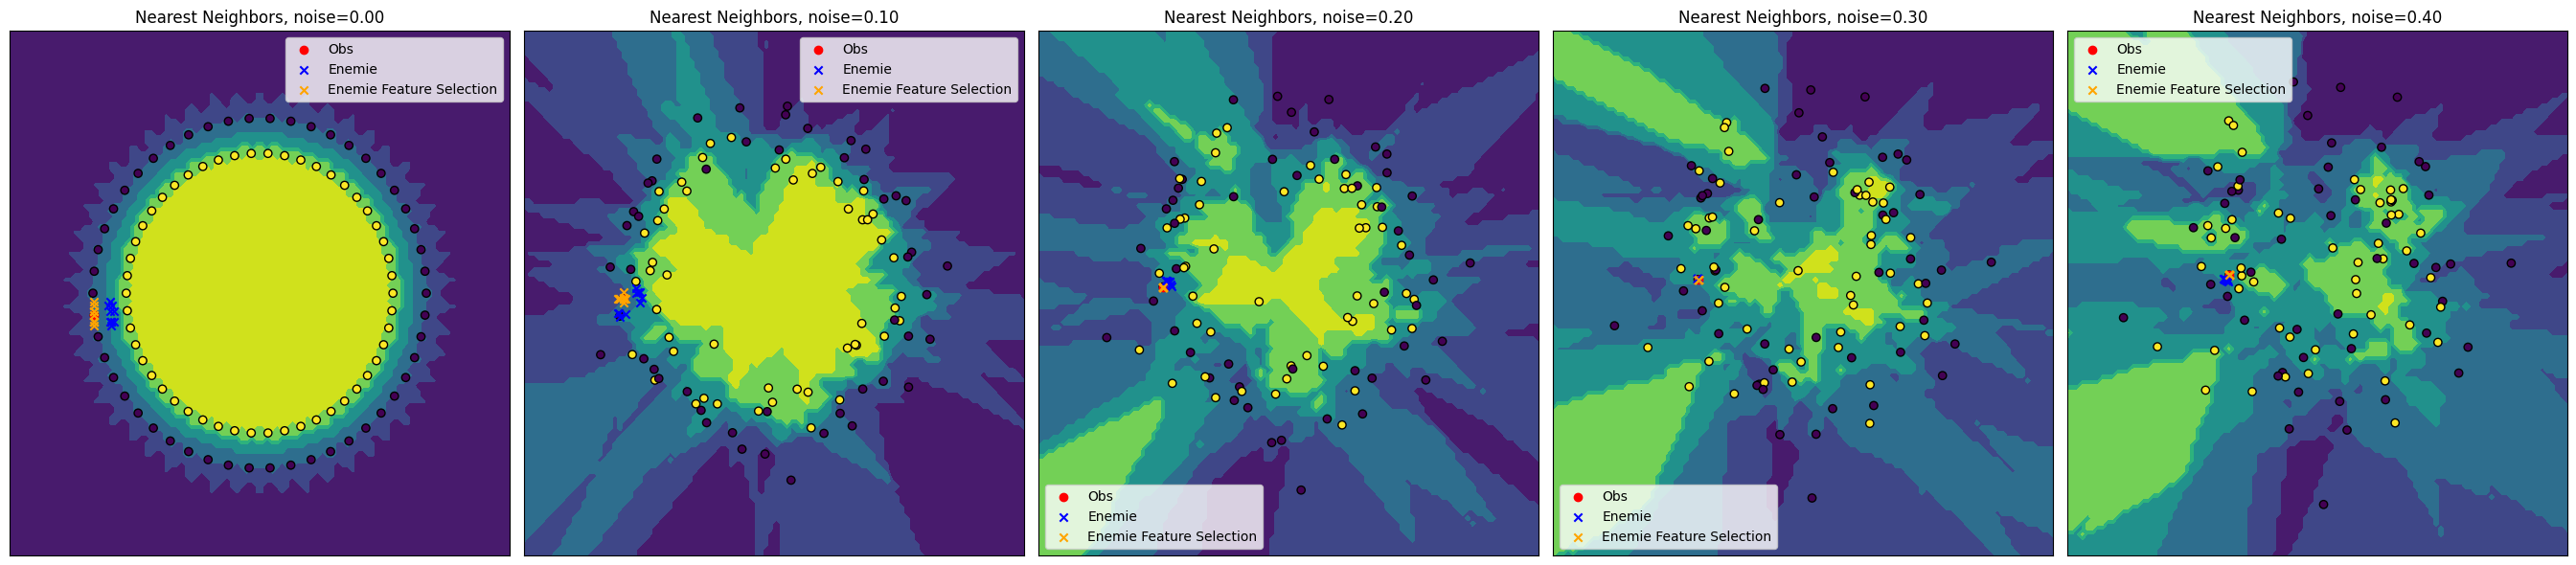

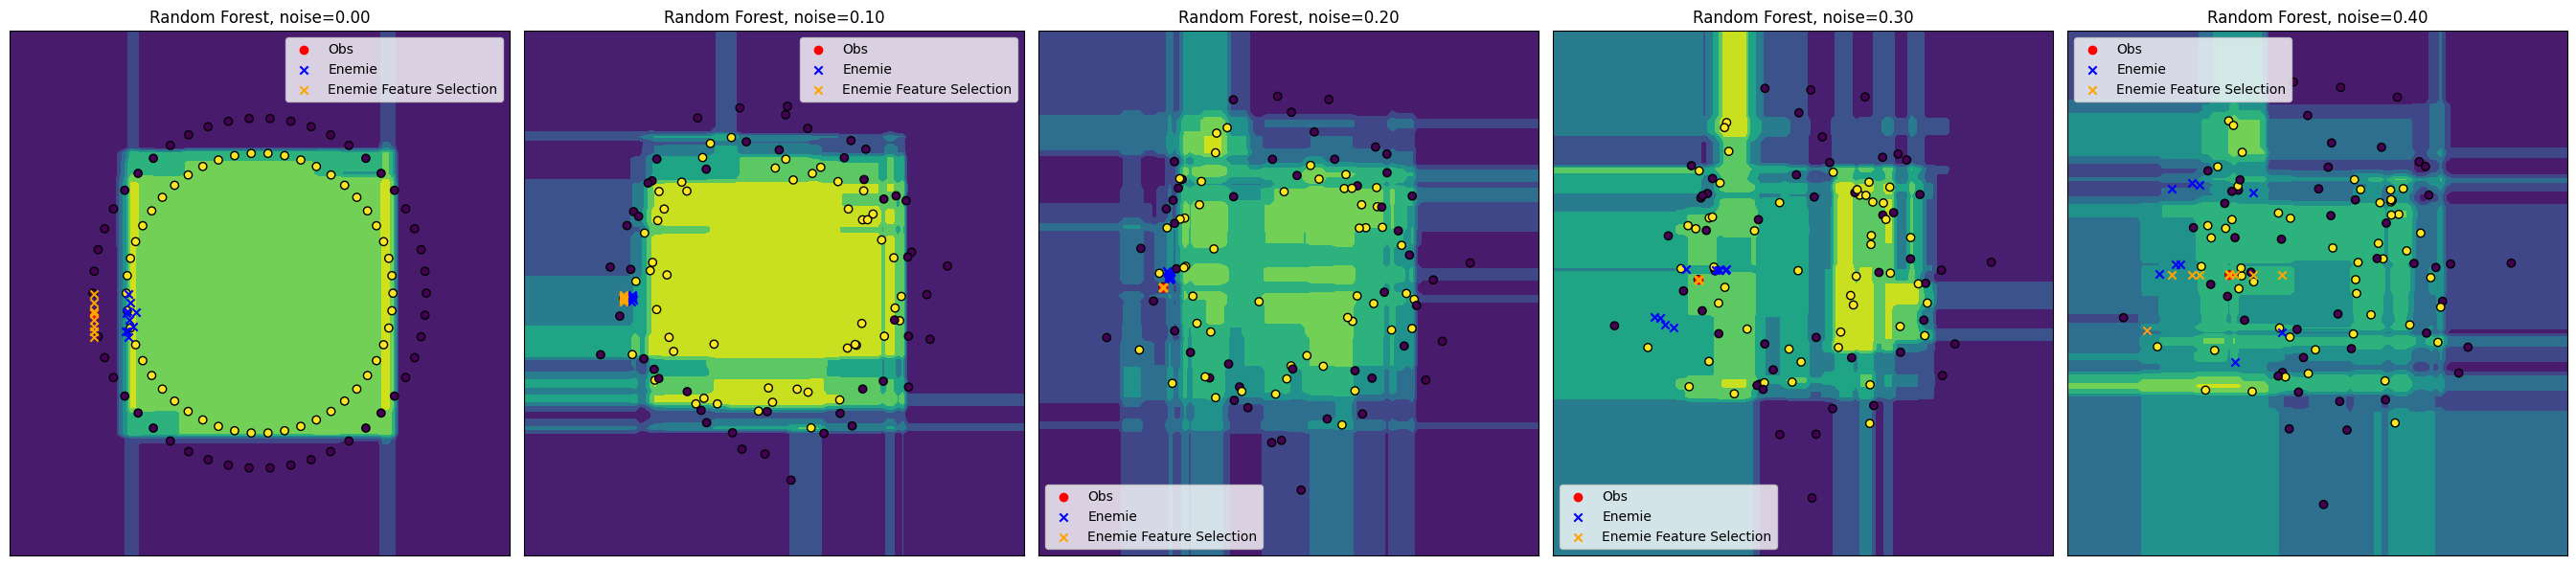

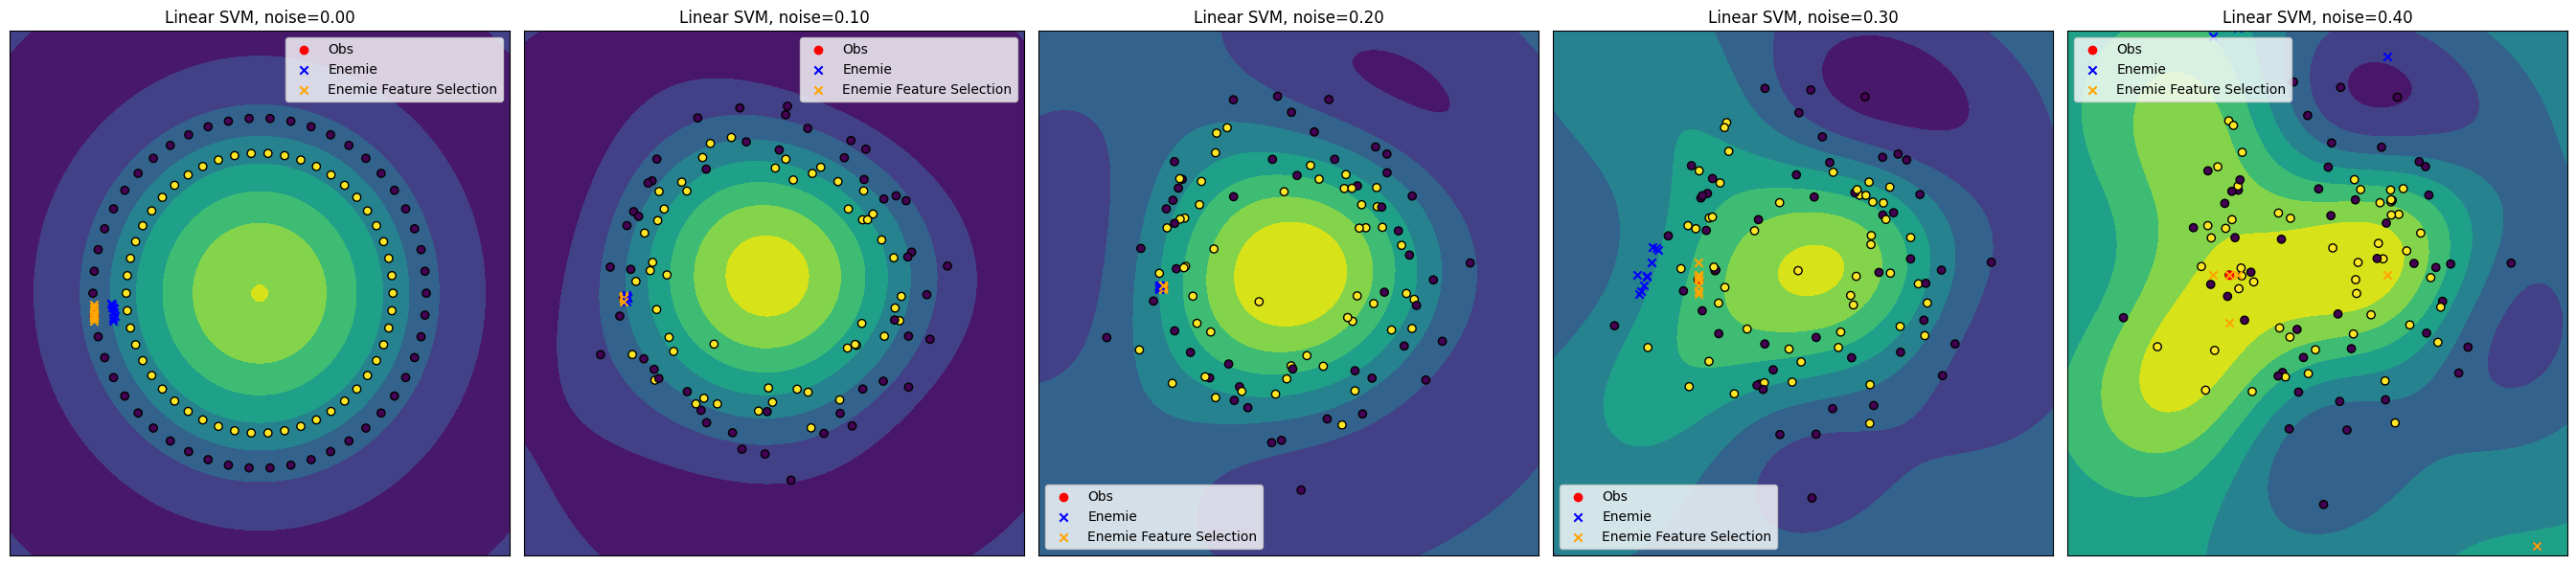

In [24]:
from sklearn.datasets import make_circles
datasets = []
noise_lvl = []
for noise in np.arange(0, 0.5, 0.1):
    noise_lvl.append(noise)
    datasets.append(make_circles(noise=noise, random_state=0))
for clf, name in zip(classifiers, names):
    fig = plt.figure(figsize=(27, 6))
    for i, (dataset, noise) in enumerate(zip(datasets,noise_lvl)):
        tmp_ax = fig.add_subplot(1, len(datasets), i+1)
        tmp_ax.set_title(f'{name}, noise={noise:.2f}')
        oui(dataset, clf, ax=tmp_ax)
    fig.tight_layout()

**Maybe utiliser un autre dataset jouet parce que lui debase les clf l'aimes pas mdr**


### Données classiques


Durant le cours, nous avons particulièrement utilisé l'exemple de l'élégibilité aux prêt bancaire. Nous proposons alors d'utiliser cette exemple pour tester Growing Sphere sur des données réelles. Voici [le dataset](https://www.kaggle.com/datasets/burak3ergun/loan-data-set)

The format of the data:

- Variable Description
- Loan_ID Unique Loan ID
- Gender Male/ Female
- Married Applicant married (Y/N)
- Dependents Number of dependents
- Education Applicant Education (Graduate/ Under Graduate)
- Self_Employed Self employed (Y/N)
- ApplicantIncome Applicant income
- CoapplicantIncome Coapplicant income
- LoanAmount Loan amount in thousands
- Loan_Amount_Term Term of loan in months
- Credit_History Credit history meets guidelines
- Property_Area Urban/ Semi Urban/ Rural
- Loan_Status Loan approved (Y/N)
